Import Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Read Dataset

In [34]:
df = pd.read_csv('predic_tabel.csv')
df

,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
0,1,Tua,Pria,Pasif,Tidak,Ya,Ya,Sering,Ada,Tidak,Ya
1,2,Tua,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Ada,Tidak
2,3,Muda,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Tidak,Tidak
3,4,Tua,Pria,Aktif,Ya,Tidak,Tidak,Jarang,Ada,Ada,Tidak
4,5,Muda,Wanita,Pasif,Ya,Tidak,Tidak,Sering,Tidak,Ada,Ya
...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,Muda,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Tidak,Tidak
29996,29997,Tua,Wanita,Aktif,Ya,Tidak,Ya,Jarang,Ada,Ada,Tidak
29997,29998,Tua,Wanita,Aktif,Ya,Tidak,Ya,Jarang,Ada,Ada,Tidak
29998,29999,Muda,Wanita,Pasif,Ya,Tidak,Tidak,Sering,Tidak,Ada,Tidak


Ekplorasi dataset

In [35]:
print("data shape : ", df.shape)
df.info()
df.describe()
df.Usia.value_counts()
df.Jenis_Kelamin.value_counts()

data shape :  (30000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   No                  30000 non-null  int64 
 1   Usia                30000 non-null  object
 2   Jenis_Kelamin       30000 non-null  object
 3   Merokok             30000 non-null  object
 4   Bekerja             30000 non-null  object
 5   Rumah_Tangga        30000 non-null  object
 6   Aktivitas_Begadang  30000 non-null  object
 7   Aktivitas_Olahraga  30000 non-null  object
 8   Asuransi            30000 non-null  object
 9   Penyakit_Bawaan     30000 non-null  object
 10  Hasil               30000 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.5+ MB


Jenis_Kelamin
Wanita    22225
Pria       7775
Name: count, dtype: int64

<Axes: xlabel='Usia', ylabel='Count'>

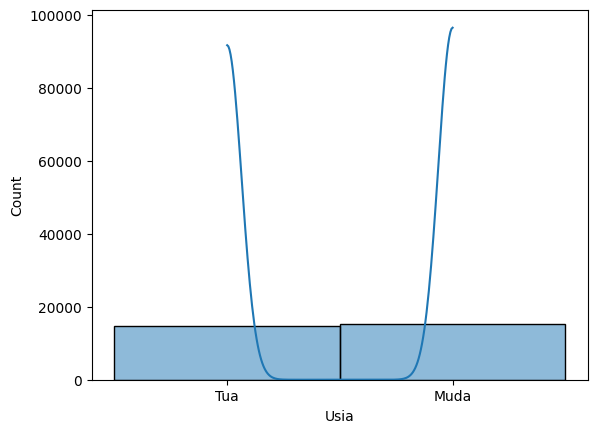

In [25]:
sns.histplot(df['Usia'], kde=True)

Preproses Dataset

In [26]:
#Cek data apakah ada yang missing value atau tidak
result = pd.DataFrame({
    "Missing Values": df.isnull().sum(),
    "Duplicate Rows": [df.duplicated().sum()] * len(df.columns)
}).T

# Menampilkan hasil
result

,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
Missing Values,0,0,0,0,0,0,0,0,0,0,0
Duplicate Rows,0,0,0,0,0,0,0,0,0,0,0


Tahap Encode Dataset

In [36]:

# Data kategorikal yang perlu di-encode
columns_to_encode = [
    'Usia', 'Jenis_Kelamin', 'Merokok', 'Bekerja',
    'Rumah_Tangga', 'Aktivitas_Begadang', 
    'Aktivitas_Olahraga', 'Asuransi', 'Penyakit_Bawaan', 'Hasil'
]

# Melakukan encoding untuk setiap kolom
label_encoder = LabelEncoder()
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())  # Untuk memastikan hasil encoding


   No  Usia  Jenis_Kelamin  Merokok  Bekerja  Rumah_Tangga  \
0   1     1              0        1        0             1   
1   2     1              0        0        0             1   
2   3     0              0        0        0             1   
3   4     1              0        0        1             0   
4   5     0              1        1        1             0   

   Aktivitas_Begadang  Aktivitas_Olahraga  Asuransi  Penyakit_Bawaan  Hasil  
0                   1                   1         0                1      1  
1                   1                   0         0                0      0  
2                   1                   0         0                1      0  
3                   0                   0         0                0      0  
4                   0                   1         1                0      1  


Menerapkan Standard Scaller

In [38]:
from sklearn.preprocessing import StandardScaler

# Identifikasi kolom numerik yang akan di-scaling (kecuali 'Hasil')
numerik_cols = df.columns.drop(['Hasil', 'No',  'Asuransi', 'Bekerja', 'Rumah_Tangga'])  # Drop kolom target dan ID
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[numerik_cols])

# Buat DataFrame baru dengan hasil scaling
df_scaled = df.copy()  # Salin data asli
df_scaled[numerik_cols] = data_scaled  # Ganti kolom numerik dengan hasil scaling

# Simpan scaler untuk digunakan di prediksi
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print(df_scaled.head())


   No      Usia  Jenis_Kelamin   Merokok  Bekerja  Rumah_Tangga  \
0   1  1.025868      -1.690716  1.014099        0             1   
1   2  1.025868      -1.690716 -0.986097        0             1   
2   3 -0.974784      -1.690716 -0.986097        0             1   
3   4  1.025868      -1.690716 -0.986097        1             0   
4   5 -0.974784       0.591465  1.014099        1             0   

   Aktivitas_Begadang  Aktivitas_Olahraga  Asuransi  Penyakit_Bawaan  Hasil  
0            0.842376            1.224235         0         1.347925      1  
1            0.842376           -0.816837         0        -0.741881      0  
2            0.842376           -0.816837         0         1.347925      0  
3           -1.187119           -0.816837         0        -0.741881      0  
4           -1.187119            1.224235         1        -0.741881      1  


In [39]:
from sklearn.model_selection import train_test_split

# X: Fitur yang dibutuhkan, Y: Target (Hasil)
X = df_scaled.drop(columns=['Hasil', 'No', 'Asuransi', 'Bekerja', 'Rumah_Tangga'])
y = df_scaled['Hasil']  # Target

# Membagi data menjadi train (80%) dan test (20%)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_test: {y_test.shape}")


x_train: (24000, 6)
y_train: (24000,)
x_test: (6000, 6)
y_test: (6000,)


Menentukan Nilai K menggunakan Elbow Method

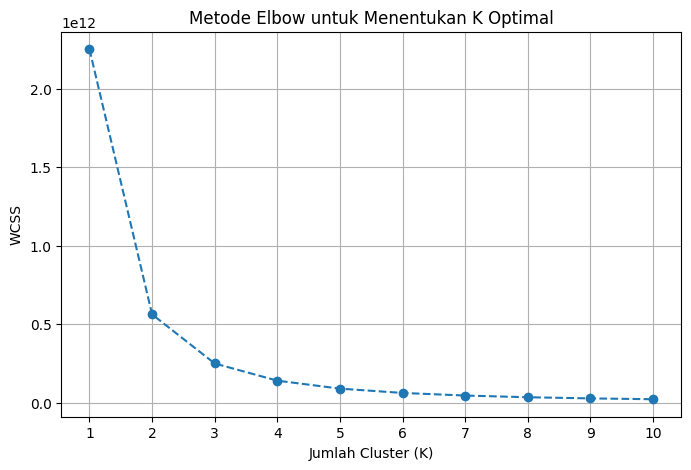

In [40]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Menentukan range K yang akan diuji
wcss = []
K_range = range(1, 11)  # Uji K dari 1 hingga 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)  # Gunakan df_scaled yang berisi data numerik yang sudah diskalakan
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# Visualisasi Metode Elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('WCSS')
plt.xticks(K_range)
plt.grid()
plt.show()


Training Model

In [41]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
KNN_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print('Akurasi KNN : {:.2f}%'.format(KNN_acc*100))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      3075
           1       1.00      0.78      0.88      2925

    accuracy                           0.89      6000
   macro avg       0.91      0.89      0.89      6000
weighted avg       0.91      0.89      0.89      6000

Akurasi KNN : 89.28%


Testing model

In [18]:
# Data testing dengan kolom yang sesuai
testing = {
    'Usia': ['Tua'],
    'Jenis_Kelamin': ['Pria'],  
    'Merokok': ['Pasif'],
    'Aktivitas_Begadang': ['Tidak'],
    'Aktivitas_Olahraga': ['Tidak'],
    'Penyakit_Bawaan': ['Tidak']
}

# Konversi data menjadi DataFrame
testing = pd.DataFrame(testing)
testing

,Usia,Jenis_Kelamin,Merokok,Aktivitas_Begadang,Aktivitas_Olahraga,Penyakit_Bawaan
0,Tua,Pria,Pasif,Tidak,Tidak,Tidak


In [42]:
import pickle

# Simpan model
with open('model/knn_model.pkl', 'wb') as model_file:
    pickle.dump(knn, model_file)

# Simpan scaler
with open('model/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
